In [0]:
import pandas as pd
from datetime import datetime, date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv("book.csv")

In [0]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


## WRANGLE ##

In [0]:
df.drop("No",axis=1,inplace=True)

In [0]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
# Rename columns
df.columns = ['year', 'month', 'day', 'hour', 'pm25', 'dewp', 'temp', 'pres', 'wind_dir', 'wind_speed', 'snow_hours', 'rain_hours']
df.head()

,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [0]:
# Set DateTime Index
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)
df.head()
df.tail()

,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
date,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
date,,,,,,,,,,,,
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2014-12-31 22:00:00,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
2014-12-31 23:00:00,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [0]:
# Drop redundant information (year, month, day, and hour) that is now in the datetime index
df = df[['pm25', 'dewp', 'temp', 'pres', 'wind_speed', 'snow_hours', 'rain_hours']]

In [0]:
# Check for missing values
print('Missing values (%)')
print('------------------')
df.isnull().sum()/df.shape[0]*100

Missing values (%)
------------------


pm25          4.716594
dewp          0.000000
temp          0.000000
pres          0.000000
wind_speed    0.000000
snow_hours    0.000000
rain_hours    0.000000
dtype: float64

In [0]:
df.dropna(how='any', inplace=True)

df.shape
df.head()

(41757, 7)

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


In [0]:
# filename = 'clean_data_book' + str(date.today()) + '.csv'
df.to_csv('clean_data_book' + str(date.today()) + '.csv', date_format='%Y-%m-%d %H:%M:%S')

In [0]:
df=pd.read_csv("clean_data_book.csv",parse_dates=True,index_col='date')

In [0]:
df.head()

,Unnamed: 0,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
date,,,,,,,,
2010-01-02 00:00:00,0,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,1,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,2,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,3,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
Unnamed: 0    41757 non-null int64
pm25          41757 non-null float64
dewp          41757 non-null int64
temp          41757 non-null float64
pres          41757 non-null float64
wind_speed    41757 non-null float64
snow_hours    41757 non-null int64
rain_hours    41757 non-null int64
dtypes: float64(4), int64(4)
memory usage: 2.9 MB


In [0]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [0]:
df.head()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 7 columns):
pm25          41757 non-null float64
dewp          41757 non-null int64
temp          41757 non-null float64
pres          41757 non-null float64
wind_speed    41757 non-null float64
snow_hours    41757 non-null int64
rain_hours    41757 non-null int64
dtypes: float64(4), int64(3)
memory usage: 2.5 MB


In [0]:
df.describe()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


<Figure size 1080x3024 with 0 Axes>

Text(0, 0.5, 'PM 2.5 (ug/m3)')

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Original Time Series')

(0, 1000)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/lines.py", line 635, in recache_always
    self.recache(always=True)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/lines.py", line 639, in recache
    xconv = self.convert_xunits(self._xorig)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py", line 186, in convert_xunits
    return ax.xaxis.convert_units(x)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/axis.py", line 1530, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/category.py", line 53, in convert
    unit.update(values)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/category.py", line 188, in update
    raise TypeError("{val!r} is not a string".format(val=val))
TypeError: datetime.da

Text(0, 0.5, 'Temperature (C)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Dewpoint (C)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Pressure (hPa)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Cumulated Wind Speed (m/s)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Cumulated Hours of Snow')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Cumulated Hours of Rain')

Text(0.5, 0, 'Year')

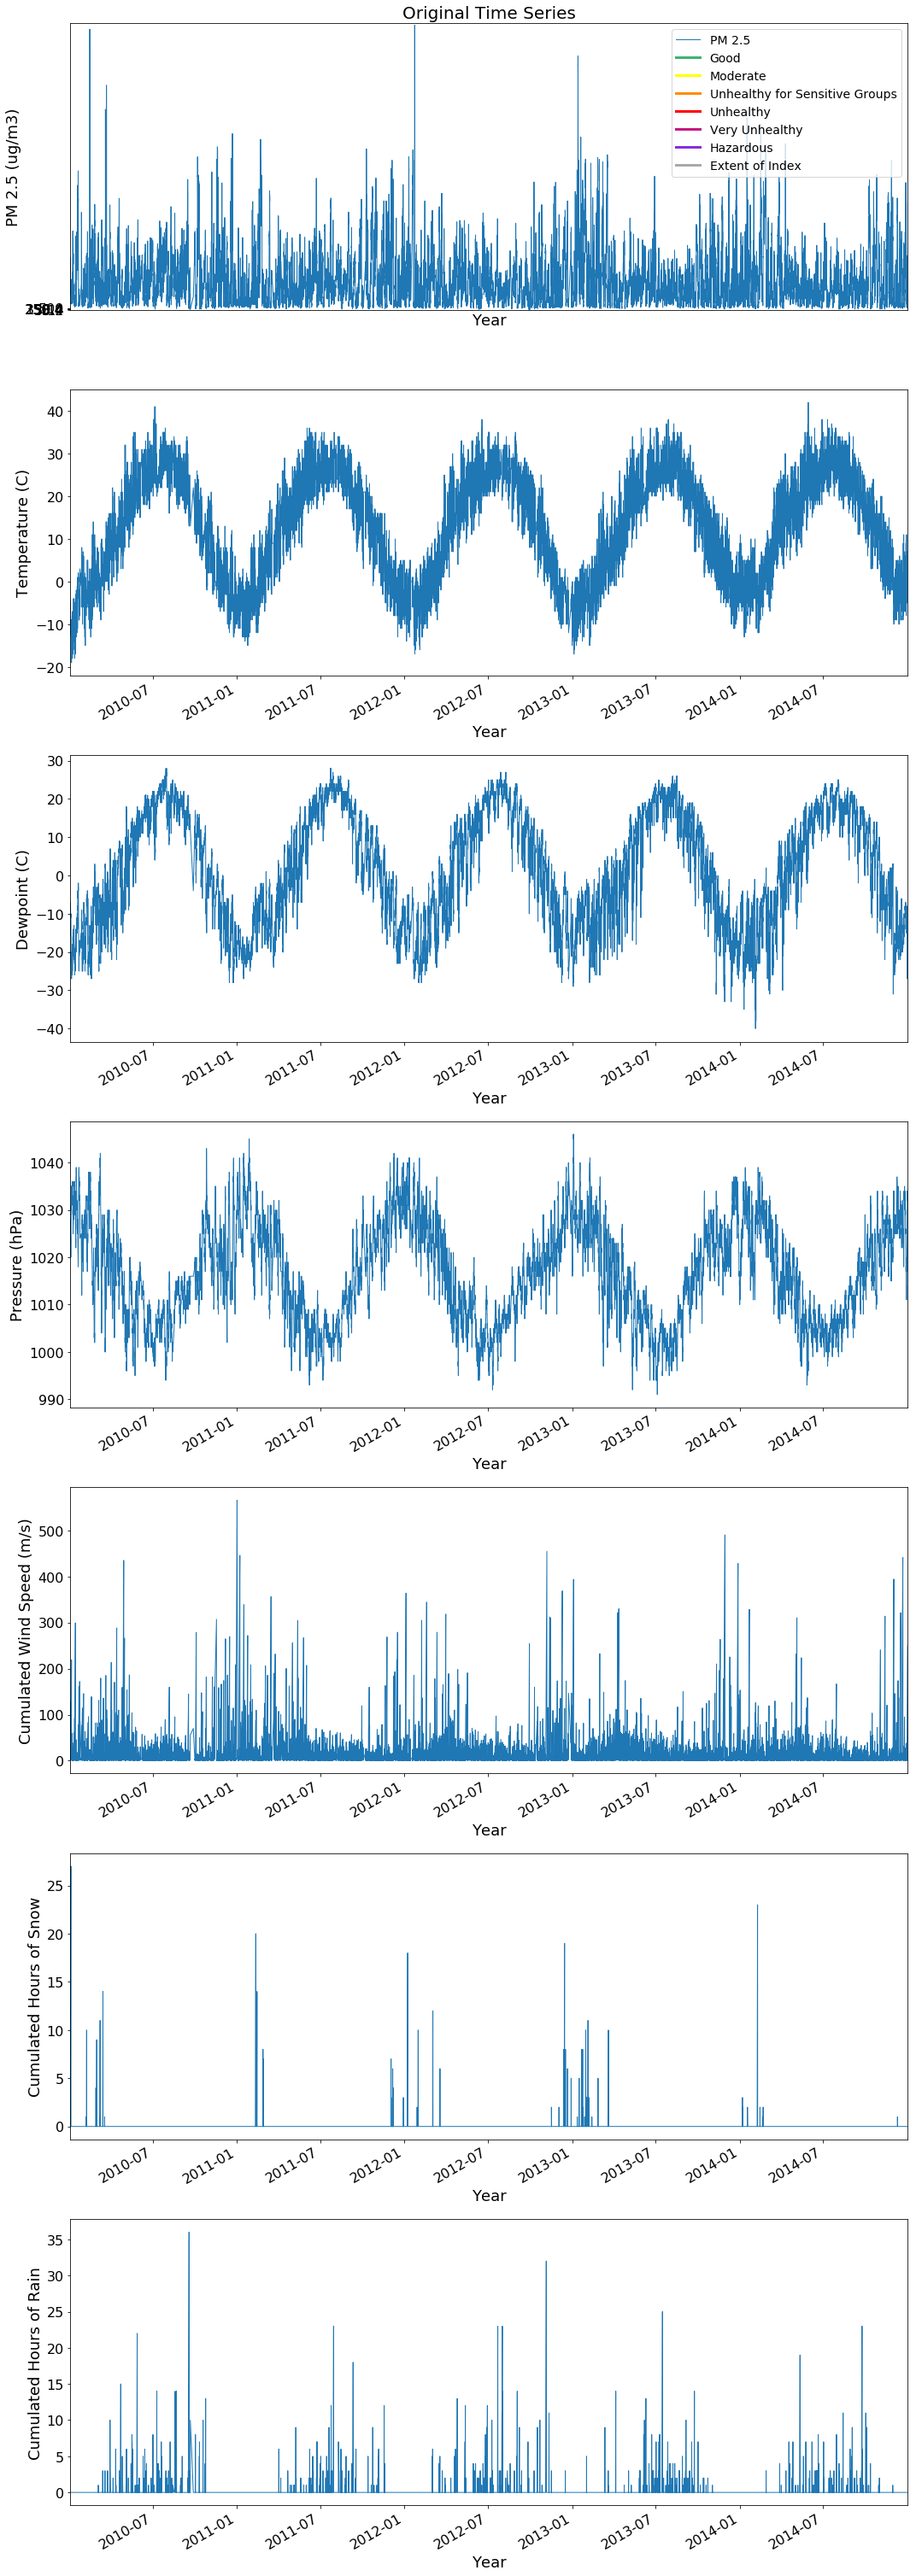

In [0]:
# Let's look at all of the time series
plt.figure(figsize=(15, 42))
plt.subplot(7,1,1)
df['pm25'].plot(linewidth=1, fontsize=16) #'lightslategray') #lightsteelblue
plt.ylabel('PM 2.5 (ug/m3)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.title('Original Time Series', fontsize=20)
plt.ylim([0,1000])
plt.plot(['2010-01-01', '2014-12-31'],['12', '12'], color='mediumseagreen', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['35.4', '35.4'], color='yellow', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['55.4', '55.4'], color='darkorange', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['150.4', '150.4'], color='red', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['250.4', '250.4'], color='mediumvioletred', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['350.4', '350.4'], color='blueviolet', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['500', '500'], color='darkgray', linewidth=3)
plt.legend(['PM 2.5', 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Extent of Index'], fontsize=14)
# Legend based on updated 2012 EPA PM 2.5 standard

plt.subplot(7,1,2)
df['temp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Temperature (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,3)
df['dewp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Dewpoint (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,4)
df['pres'].plot(linewidth=1, fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,5)
df['wind_speed'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Wind Speed (m/s)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,6)
df['snow_hours'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Hours of Snow', fontsize=18) 
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,7)
df['rain_hours'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Hours of Rain', fontsize=18) 
plt.xlabel('Year', fontsize=18)
plt.tight_layout()

# plt.savefig('../figures/original_series.png');

<Figure size 1080x3024 with 0 Axes>

Text(0, 0.5, 'PM 2.5 (ug/m3)')

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Original Time Series')

(0, 1000)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/lines.py", line 635, in recache_always
    self.recache(always=True)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/lines.py", line 639, in recache
    xconv = self.convert_xunits(self._xorig)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py", line 186, in convert_xunits
    return ax.xaxis.convert_units(x)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/axis.py", line 1530, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/category.py", line 53, in convert
    unit.update(values)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/category.py", line 188, in update
    raise TypeError("{val!r} is not a string".format(val=val))
TypeError: datetime.da

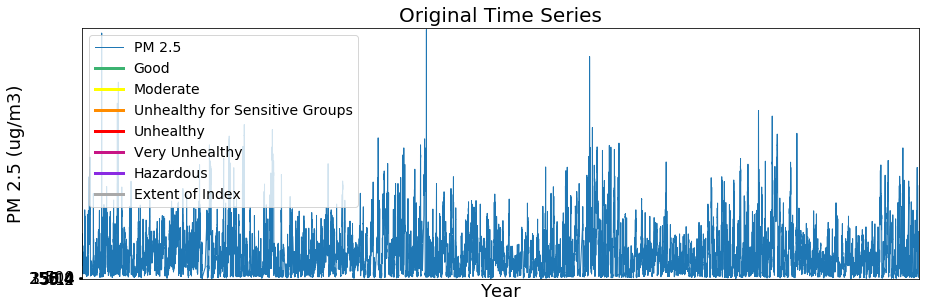

In [0]:
%matplotlib inline
plt.figure(figsize=(15, 42))
plt.subplot(7,1,1)
df['pm25'].plot(linewidth=1, fontsize=16) #'lightslategray') #lightsteelblue
plt.ylabel('PM 2.5 (ug/m3)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.title('Original Time Series', fontsize=20)
plt.ylim([0,1000])
plt.plot(['2010-01-01', '2014-12-31'],['12', '12'], color='mediumseagreen', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['35.4', '35.4'], color='yellow', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['55.4', '55.4'], color='darkorange', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['150.4', '150.4'], color='red', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['250.4', '250.4'], color='mediumvioletred', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['350.4', '350.4'], color='blueviolet', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['500', '500'], color='darkgray', linewidth=3)
plt.legend(['PM 2.5', 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Extent of Index'], fontsize=14)

Text(0, 0.5, 'Temperature (C)')

Text(0.5, 0, 'Year')

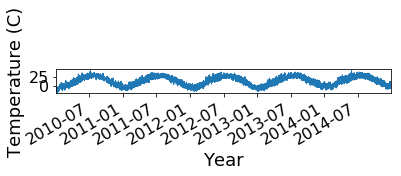

In [0]:
%matplotlib inline
import seaborn as sns
plt.subplot(7,1,2)
df['temp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Temperature (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.show()

## supervised regression models ##

In [0]:
import numpy as np
from time import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

import itertools
import warnings

# Classical Stats Modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prophet Model
# from fbprophet import Prophet

# Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error  
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [0]:
pm25 = df['pm25']
models=[]

In [0]:
def forecast_bias(y_truth, y_pred):
    '''Compute mean forecasting bias'''
    bias = np.mean(y_truth - y_pred)
    return bias

In [0]:
def get_performance_metrics(model_name, y_truth, y_pred):
    '''Build a dictionary of regression model performance metrics: R2, MSE, and Bias'''
    metrics = {}
    metrics = {'Model': model_name, 'R2': r2_score(y_truth, y_pred), 
               'MSE': mean_squared_error(y_truth, y_pred), 
               'Bias': forecast_bias(y_truth, y_pred)}
    return (metrics)

In [0]:
# Prepare lag features out to one week #24-hours  
for i in range(1,721):
    pm25_lag_feat = "pm25_lag %s" %i
    dewp_lag_feat = "dewp_lag %s" %i
    df[pm25_lag_feat]  = df['pm25'].diff(periods=-i)
    df[dewp_lag_feat]  = df['dewp'].diff(periods=-i)

# Remove index 
df.reset_index(drop=True, inplace=True)

# Assign X and y
y = df['pm25'].iloc[:-720] #-24 
X = df.drop(['pm25'], axis=1).iloc[:-720]

# Standardize the data
Xscaled = scale(X)

# Hold out last year of data for final out-of-sample test 
X_test = Xscaled[-8760:]
y_test = y[-8760:]

# Split first four years of data into training and evaluating sets
X_train, X_eval, y_train, y_eval = train_test_split(Xscaled[:-8760], y[0:-8760], train_size=0.7, random_state=42)

## fit and predict ##

In [0]:
linreg = get_performance_metrics('Linear Regression', y_eval, LinearRegression(fit_intercept=True, copy_X=True)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(linreg)

In [0]:
knn = linreg = get_performance_metrics('KNN Regression', y_eval, KNeighborsRegressor()
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(knn)

In [0]:
sgd = get_performance_metrics('Stochastic Gradient Descent', y_eval, SGDRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(sgd)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
dtr = get_performance_metrics('Decision Tree', y_eval, DecisionTreeRegressor()
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(dtr)

In [0]:
rfr = get_performance_metrics('Random Forest', y_eval, RandomForestRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(rfr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
mlp = get_performance_metrics('Multi-Layer Perceptron', y_eval, MLPRegressor(random_state=42)
                                        .fit(X_train, y_train)
                                        .predict(X_eval))
models.append(mlp)

## evaluation##

In [0]:
df_models = pd.DataFrame(models).set_index('Model')
df_models = df_models[['R2', 'MSE', 'Bias']]
df_models.sort_values('R2', ascending=False)

,R2,MSE,Bias
Model,,,
Multi-Layer Perceptron,0.999137,7.203935,0.451428
Random Forest,0.993945,50.515602,1.782600
Decision Tree,0.984143,132.294093,1.531599
KNN Regression,0.972839,226.608240,0.668546
Linear Regression,0.930707,578.115971,0.213100
Stochastic Gradient Descent,-32.378181,278476.536354,-0.224748


## forecasting ##

In [0]:
# Fit final model
final_model = MLPRegressor(random_state=42).fit(Xscaled[:-8760], y[:-8760]) #fit on all data except final year

# Make prediction on out-of-sample (test) data
y_pred = final_model.predict(X_test)
get_performance_metrics('Final Model', y_test, y_pred)

{'Bias': -2.0140513909974755,
 'MSE': 441.1430478304973,
 'Model': 'Final Model',
 'R2': 0.9504627130838013}

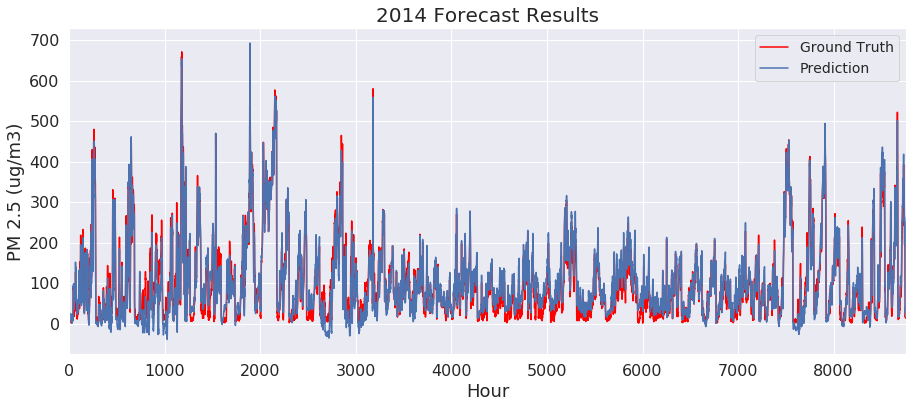

In [0]:
# Plot
fig = plt.figure(figsize=(15,6))
y_test.reset_index()['pm25'].plot(color='red')
pd.Series(y_pred).plot(fontsize=16)
plt.title('2014 Forecast Results', fontsize=20)
plt.xlabel('Hour', fontsize=18)
plt.ylabel('PM 2.5 (ug/m3)', fontsize=18)
plt.legend(['Ground Truth', 'Prediction'], fontsize=14);
# plt.savefig('../figures/forecast_results.png');